# PRODIGY INFOTECH

# **Task-03**

##### **Contribution**    - Individual
##### **Author**    - Allan Cheerakunnil Alex

# **Let's Begin !**

### Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Personal Projects/Prodigy Tasks/Bank - 03/bank-data.csv')
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [ ]:
df.tail()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO
599,ID12700,38,MALE,TOWN,26671.60,NO,0,YES,NO,YES,YES,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [ ]:
df['sex'].value_counts()

FEMALE    300
MALE      300
Name: sex, dtype: int64

In [ ]:
convert = {'sex':{'FEMALE':0, 'MALE':1},
           'region': {'INNER_CITY':0, 'TOWN':1, 'RURAL':2, 'SUBURBAN':3},
           'married': {'YES':1, 'NO':0},
           'car': {'YES':1, 'NO':0},
           'save_act': {'YES':1, 'NO':0},
           'current_act': {'YES':1, 'NO':0},
           'mortgage': {'YES':1, 'NO':0},
           'pep': {'YES':1, 'NO':0}}
df = df.replace(convert)
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40,1,1,30085.10,1,3,1,0,1,1,0
2,ID12103,51,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23,0,1,20375.40,1,3,0,0,1,0,0
4,ID12105,57,0,2,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31,0,1,15976.30,1,0,1,1,0,0,1
598,ID12699,29,1,0,14711.80,1,0,0,1,0,1,0


In [ ]:
xc = ['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
y = ['YES', 'NO']
all_inputs = df[xc]
all_classes = df['pep']

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(all_inputs, all_classes, train_size = 0.7, random_state = 1)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
score = clf.score(x_test, y_test)
print(score)

0.8611111111111112


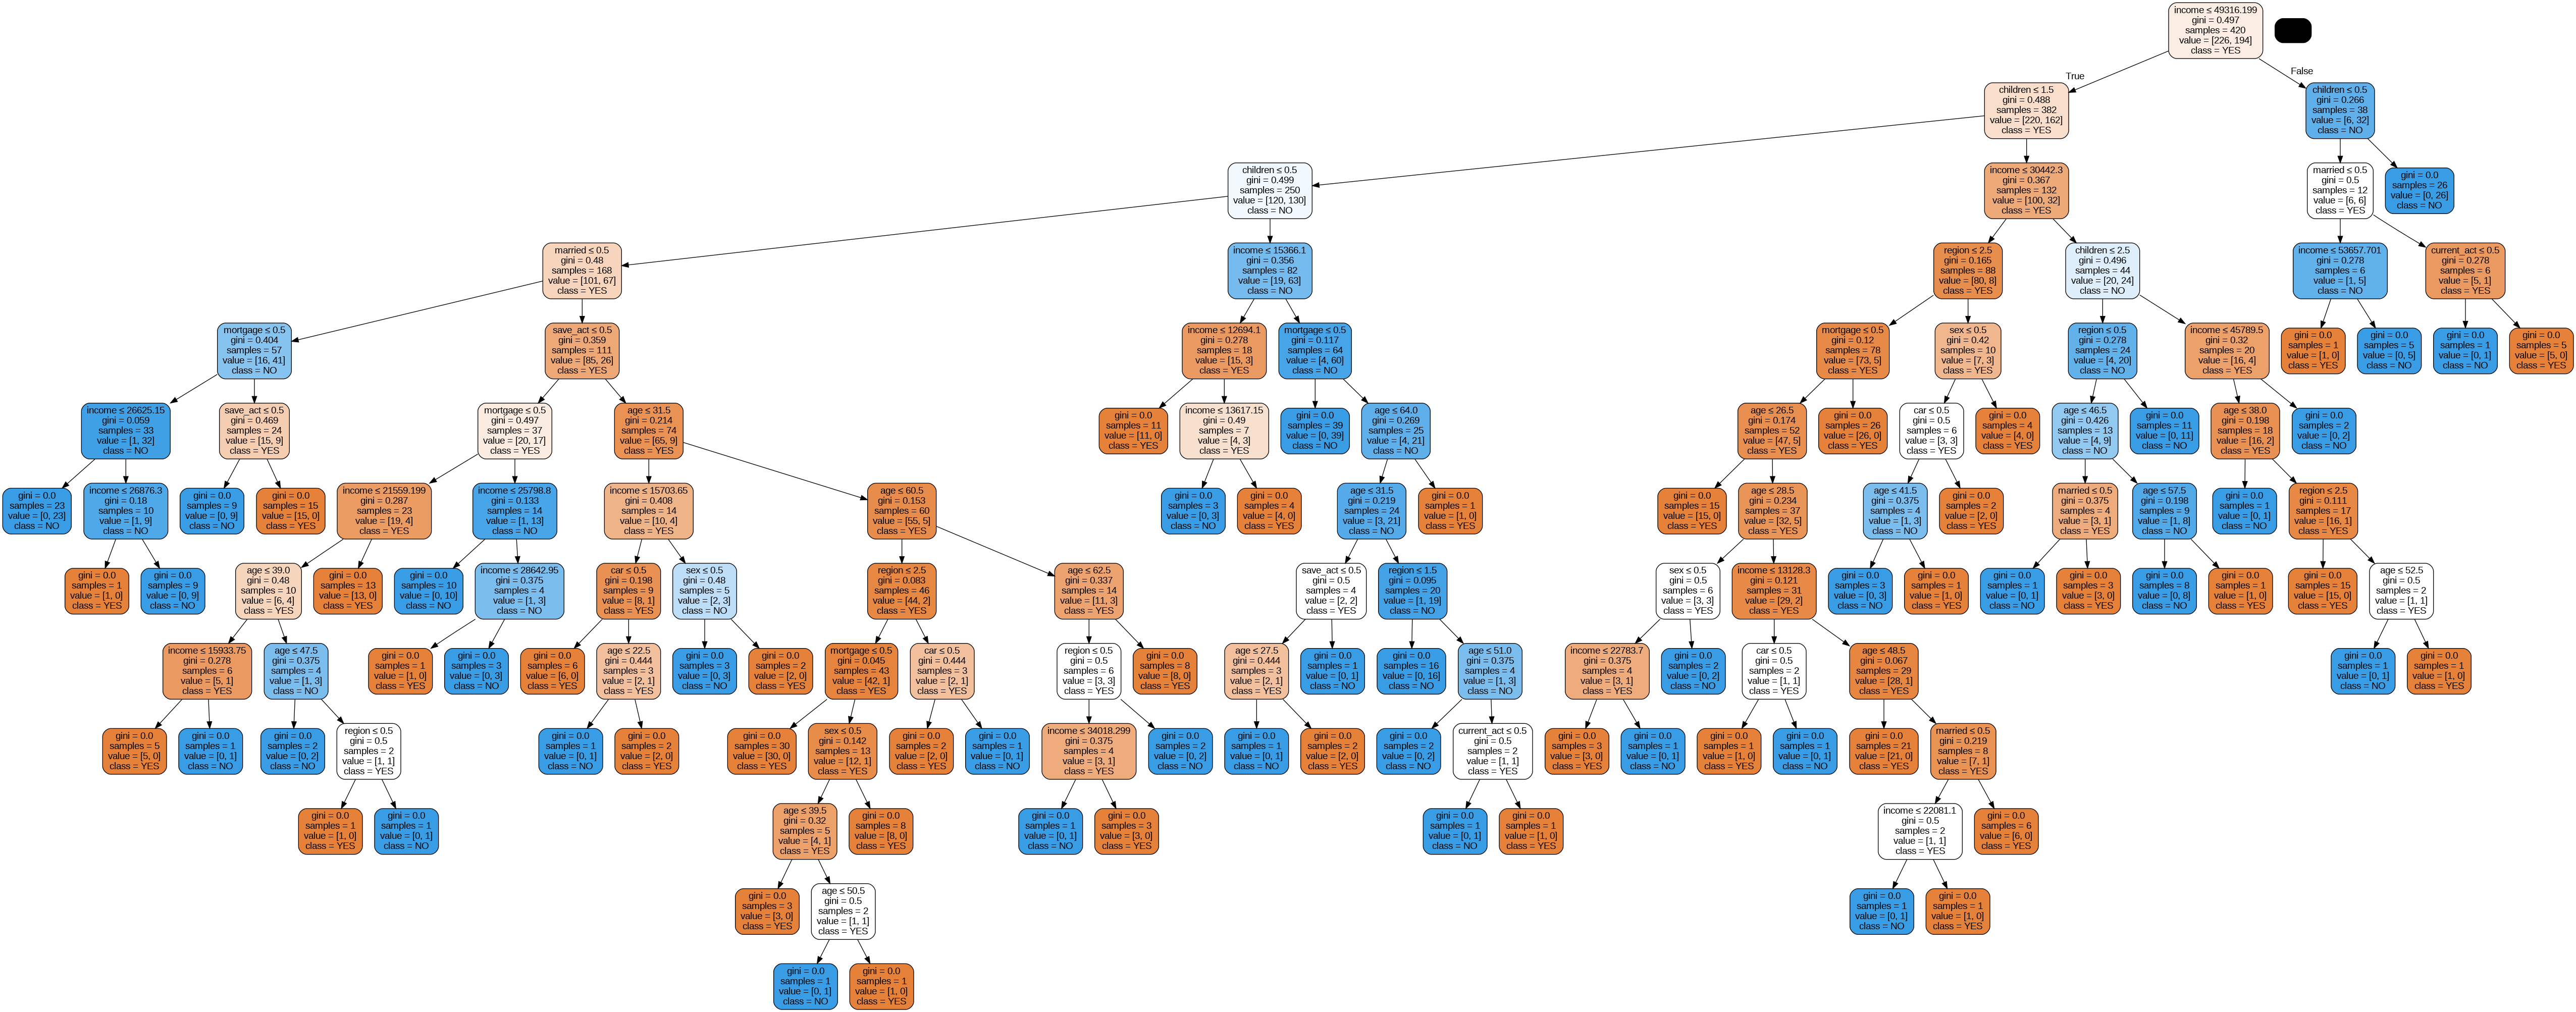

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=xc, class_names=y)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('blankTreeTrain.png')
Image(graph.create_png())

# **Thank You**